In [1]:
# import the libraries as shown below
# ResNet50 - Its transfer learning
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
print ('Imported')

Imported


In [2]:
print(tf.__version__)

2.3.1


In [3]:
# Images are not resized
IMAGE_SIZE = [224, 224] # Input 224, defualt for resnet
Train_path = 'Datasets/Datasets/Train'
Test_path =  'Datasets/Datasets/Test'
print ("Train & Test created!")

Train & Test created!


In [4]:
Train_path

'Datasets/Datasets/Train'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Input_shape = [x,y] + [z] - 3 channels (RGB)
# x - weigth, y- hieght
# weights - imgenet (ResNet has been trained on this)
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
print ("Its done - Weights have been downloaded in your cache memory of your system")

Its done - Weights have been downloaded in your cache memory of your system


In [6]:
# Lets check the summary
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
## Do not train the existing weights
for layer in resnet.layers:
    layer.trainable = False
print ('Existing wieghts have not been trained !')

Existing wieghts have not been trained !


In [8]:
# Find the folders
folders = glob('Datasets/Datasets/Train/*')

In [9]:
folders
# This will give number of outputs, we will need

['Datasets/Datasets/Train\\audi',
 'Datasets/Datasets/Train\\lamborghini',
 'Datasets/Datasets/Train\\mercedes']

In [10]:
# Lets flatten the output of the layers
# Why we do flatten -
#RGB
'''
(R,G,B) - (255,0,0) - This is for red colour
RED - 255
flatten - it creates the strip of dimention of the picture.
24 * 24 = 576 pixels 
We are converting 2D into 1D
'''

flat = Flatten()(resnet.output)
print ('Flattened!!')

Flattened!!


In [11]:
# Dense layer 
# Dense layer do not have LR - Its like ANN unlike CNN
# Its a sigmoid function - multiple catogaries
pred_dense = Dense(len(folders), activation='softmax')(flat)
# Model Object
model = Model(inputs=resnet.input, outputs=pred_dense)
print ('Model object has been created successfully !')

Model object has been created successfully !


In [12]:
# Model structure
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

conv4_block4_1_relu (Activation (None, 14, 14, 256)  0           conv4_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block4_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block4_2_relu (Activation (None, 14, 14, 256)  0           conv4_block4_2_bn[0][0]          
__________________________________________________________________________________________________
conv4_block4_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block4_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_bloc

In [13]:
# Compile the model and set the optimization values
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
# Scalling (It will be converted 0 to 1)
# We do data augmentation only for train data
# Data Augmentation should not be done for test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
## Lets apply augmentation on out train data
## Reading the images from directory
training_set = train_datagen.flow_from_directory('Datasets/Datasets/Train',
                                                target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/Test',
                                                target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
run_model = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 5.0981 - accuracy: 0.3692 - val_loss: 1.5971 - val_accuracy: 0.1552
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 3.7168 - accuracy: 0.4308 - val_loss: 7.0048 - val_accuracy: 0.3276
Epoch 3/50
3/3 [==============================] - 9s 3s/step - loss: 8.2460 - accuracy: 0.4462 - val_loss: 3.7072 - val_accuracy: 0.5172
Epoch 4/50
3/3 [==============================] - 6s 2s/step - loss: 4.8155 - accuracy: 0.4154 - val_loss: 4.2595 - val_accuracy: 0.1552
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 4.2471 - accuracy: 0.3692 - val_loss: 4.4014 - val_accuracy: 0.4310
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 4.3033 - accuracy: 0.5231 - val_loss: 4.2733 - val_accuracy: 0.5172
Epoch 7/50
3/3 [==============================] - 8s 3s/step - loss: 2.4573 - accuracy: 0.3692 - val_l

In [18]:
## If accuracy is not very good then please add more number of images to get good accuracy

In [19]:
# Lets see the history of run model
run_model.history

{'loss': [5.0980939865112305,
  3.716829538345337,
  8.246018409729004,
  4.815454006195068,
  4.247128963470459,
  4.303341865539551,
  2.4572739601135254,
  3.9210731983184814,
  4.474245071411133,
  4.218343734741211,
  4.584964275360107,
  3.116236686706543,
  2.6223208904266357,
  3.8107283115386963,
  1.3231704235076904,
  2.6625986099243164,
  2.899358034133911,
  1.4793109893798828,
  1.7137171030044556,
  2.118934154510498,
  0.9058839082717896,
  1.129014015197754,
  0.8180861473083496,
  1.9927574396133423,
  2.7550742626190186,
  2.118741750717163,
  1.247522234916687,
  0.9468061923980713,
  0.9253202676773071,
  0.8429126739501953,
  1.0903242826461792,
  0.4336607754230499,
  0.8239664435386658,
  1.5603611469268799,
  0.5896790623664856,
  0.885094404220581,
  2.26910400390625,
  3.4950294494628906,
  1.493474006652832,
  0.773004412651062,
  1.0947319269180298,
  2.009005546569824,
  5.942866802215576,
  0.848994791507721,
  1.1689306497573853,
  0.9825969934463501,
  

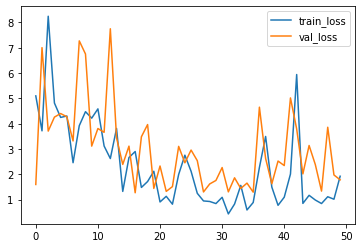

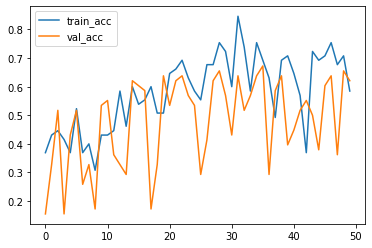

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the loss
plt.plot(run_model.history['loss'],label='train_loss')
plt.plot(run_model.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_val_loss')

# Plot the accuracy
plt.plot(run_model.history['accuracy'],label='train_acc')
plt.plot(run_model.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()
plt.savefig('Accuracy_val_Accuracy')

In [21]:
## Saving the model
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')
print ('Model saved successfully !')

Model saved successfully !


In [22]:
## Prediction of test data
## Take the highest probability index
y_pred = model.predict(test_set)
y_pred

array([[1.1748754e-02, 9.8497146e-01, 3.2798517e-03],
       [9.9497992e-01, 2.0562317e-03, 2.9638326e-03],
       [7.1370256e-01, 2.8623617e-01, 6.1243532e-05],
       [5.3055887e-03, 9.3630540e-01, 5.8389056e-02],
       [8.6586952e-02, 8.5959679e-01, 5.3816307e-02],
       [4.1863498e-08, 1.0000000e+00, 1.9487727e-08],
       [1.7242627e-02, 1.2029766e-03, 9.8155439e-01],
       [2.5877744e-01, 7.4095106e-01, 2.7153335e-04],
       [2.4038240e-02, 9.5790297e-01, 1.8058803e-02],
       [7.2348094e-01, 2.7242327e-01, 4.0957876e-03],
       [1.4188796e-02, 9.7924739e-01, 6.5637869e-03],
       [7.6059941e-08, 5.2079431e-06, 9.9999475e-01],
       [9.6713269e-01, 3.2363936e-02, 5.0331879e-04],
       [2.1491745e-03, 9.9768066e-01, 1.7019223e-04],
       [1.1431862e-02, 9.8823160e-01, 3.3656170e-04],
       [8.1055313e-01, 1.8942885e-01, 1.8110979e-05],
       [2.0337065e-01, 3.7272406e-05, 7.9659212e-01],
       [1.2490912e-03, 9.9874902e-01, 1.9303488e-06],
       [5.3449368e-01, 1.086

In [23]:
# Find the index of max values in the aray 
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
#We will get 50 values 
y_pred

array([1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [25]:
## Laoding the model which we have saved in our system.
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
img=image.load_img('Datasets/Datasets/Test/lamborghini/26.jpg',target_size=(224,224))

In [27]:
y=image.img_to_array(img)
y

array([[[ 6.,  8., 21.],
        [ 7.,  9., 22.],
        [10., 12., 25.],
        ...,
        [ 8., 10., 25.],
        [ 8., 10., 25.],
        [ 8., 10., 25.]],

       [[ 6.,  8., 21.],
        [ 7.,  9., 22.],
        [10., 12., 25.],
        ...,
        [ 8., 10., 25.],
        [ 8., 10., 25.],
        [ 8., 10., 25.]],

       [[ 6.,  8., 21.],
        [ 7.,  9., 22.],
        [10., 12., 25.],
        ...,
        [ 8., 10., 25.],
        [ 8., 10., 25.],
        [ 8., 10., 25.]],

       ...,

       [[ 7.,  9., 24.],
        [ 7.,  9., 24.],
        [ 7.,  9., 24.],
        ...,
        [ 7.,  9., 24.],
        [ 7.,  9., 24.],
        [ 7.,  9., 24.]],

       [[ 7.,  9., 24.],
        [ 7.,  9., 24.],
        [ 7.,  9., 24.],
        ...,
        [ 7.,  9., 24.],
        [ 7.,  9., 24.],
        [ 7.,  9., 24.]],

       [[ 8., 10., 25.],
        [ 8., 10., 25.],
        [ 8., 10., 25.],
        ...,
        [ 8., 10., 25.],
        [ 8., 10., 25.],
        [ 8., 10., 25.]]

In [28]:
y.shape

(224, 224, 3)

In [29]:
y = y/255
y

array([[[0.02352941, 0.03137255, 0.08235294],
        [0.02745098, 0.03529412, 0.08627451],
        [0.03921569, 0.04705882, 0.09803922],
        ...,
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922]],

       [[0.02352941, 0.03137255, 0.08235294],
        [0.02745098, 0.03529412, 0.08627451],
        [0.03921569, 0.04705882, 0.09803922],
        ...,
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922]],

       [[0.02352941, 0.03137255, 0.08235294],
        [0.02745098, 0.03529412, 0.08627451],
        [0.03921569, 0.04705882, 0.09803922],
        ...,
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922],
        [0.03137255, 0.03921569, 0.09803922]],

       ...,

       [[0.02745098, 0.03529412, 0.09411765],
        [0.02745098, 0.03529412, 0.09411765],
        [0.02745098, 0

In [30]:
y = np.expand_dims(y, axis=0)
img_data = preprocess_input(y)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[1.50293808e-05, 1.21010025e-05, 9.99972820e-01]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)        

In [33]:
a

array([2], dtype=int64)